In [ ]:
import librosa.display
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
import sys
import warnings
import resampy



if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:

TESS_DataSet = "C:/Users/IDEAPAD GAMEING/Downloads/archive/TESS Toronto All_Emotionsal speech set data/TESS Toronto All_Emotionsal speech set data/"
RAVADESS_DataSet = "C:/Users/IDEAPAD GAMEING/Downloads/archive (1)/audio_speech_actors_01-24/"
SAVEE_DataSet = "C:/Users/IDEAPAD GAMEING/Downloads/archive (2)/ALL/"
CREMA_DataSet = "C:/Users/IDEAPAD GAMEING/Downloads/archive (3)/AudioWAV/"

dir_list = os.listdir(SAVEE_DataSet)
dir_list[0:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

In [ ]:
dir_list = os.listdir(SAVEE_DataSet)

# parse the filename to get the All_Emotionss
All_Emotions=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        All_Emotions.append('male_angry')
    elif i[-8:-6]=='_d':
        All_Emotions.append('male_disgust')
    elif i[-8:-6]=='_f':
        All_Emotions.append('male_fear')
    elif i[-8:-6]=='_h':
        All_Emotions.append('male_happy')
    elif i[-8:-6]=='_n':
        All_Emotions.append('male_neutral')
    elif i[-8:-6]=='sa':
        All_Emotions.append('male_sad')
    elif i[-8:-6]=='su':
        All_Emotions.append('male_surprise')
    else:
        All_Emotions.append('male_error')
    path.append(SAVEE_DataSet + i)

SAVEE_DataSet_df = pd.DataFrame(All_Emotions, columns = ['labels'])
SAVEE_DataSet_df['source'] = 'SAVEE_DataSet'
SAVEE_DataSet_df = pd.concat([SAVEE_DataSet_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_DataSet_df.labels.value_counts()


labels
male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: count, dtype: int64

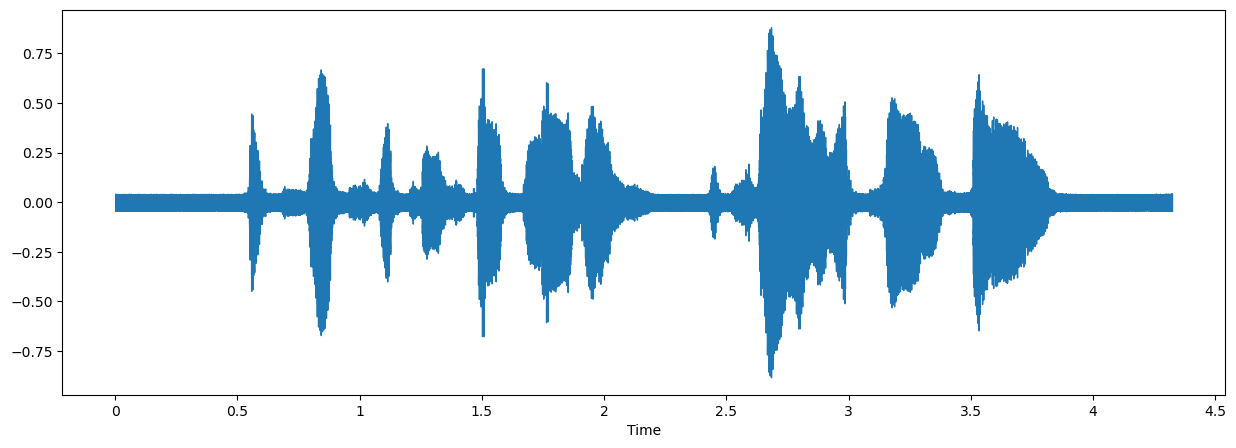

In [ ]:
fname = SAVEE_DataSet + 'DC_f11.wav'
data, samples = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=samples)

ipd.Audio(fname)

In [ ]:
Dir_lists = os.listdir(RAVDESS_DataSet)
Dir_lists.sort()

All_Emotions = []
gender_identity	 = []
Dir = []
for i in Dir_lists:
    fname = os.listdir(RAVDESS_DataSet + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        All_Emotions.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender_identity	.append(temp)
        Dir.append(RAVDESS_DataSet + i + '/' + f)


RAVDESS_DataSet_df = pd.DataFrame(All_Emotions)
RAVDESS_DataSet_df = RAVDESS_DataSet_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAVDESS_DataSet_df = pd.concat([pd.DataFrame(gender_identity	),RAVDESS_DataSet_df],axis=1)
RAVDESS_DataSet_df.columns = ['gender_identity	','All_Emotions']
RAVDESS_DataSet_df['labels'] =RAVDESS_DataSet_df.gender_identity	 + '_' + RAVDESS_DataSet_df.All_Emotions
RAVDESS_DataSet_df['source'] = 'RAVDESS_DataSetDESS'
RAVDESS_DataSet_df = pd.concat([RAVDESS_DataSet_df,pd.DataFrame(Dir, columns = ['Dir'])],axis=1)
RAVDESS_DataSet_df = RAVDESS_DataSet_df.drop(['gender_identity	', 'All_Emotions'], axis=1)
RAVDESS_DataSet_df.labels.value_counts()

labels
male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: count, dtype: int64

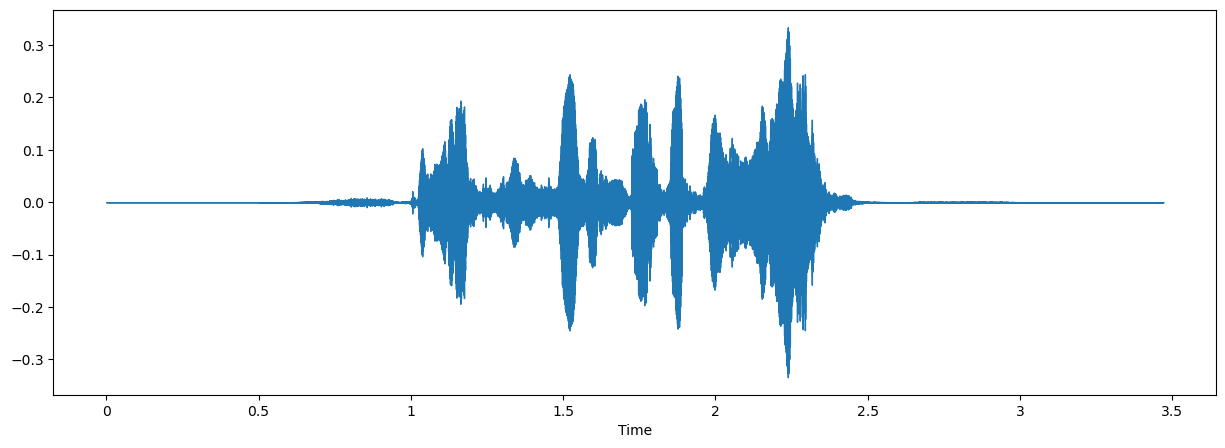

In [ ]:
fname = RAVDESS_DataSet + 'Actor_14/03-01-06-02-02-02-14.wav'
data, samples = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=samples)

ipd.Audio(fname)

In [ ]:
Dir_lists = os.listdir(TESS_DataSet)
Dir_lists.sort()
Dir_lists


['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [ ]:
Dir = []
All_Emotions = []

for i in Dir_lists:
    fname = os.listdir(TESS_DataSet + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            All_Emotions.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            All_Emotions.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            All_Emotions.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            All_Emotions.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            All_Emotions.append('female_neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            All_Emotions.append('female_surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            All_Emotions.append('female_sad')
        else:
            All_Emotions.append('Unknown')
        Dir.append(TESS_DataSet + i + "/" + f)

TESS_DataSet_df = pd.DataFrame(All_Emotions, columns = ['labels'])
TESS_DataSet_df['source'] = 'TESS_DataSet'
TESS_DataSet_df = pd.concat([TESS_DataSet_df,pd.DataFrame(Dir, columns = ['Dir'])],axis=1)
TESS_DataSet_df.labels.value_counts()

labels
female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: count, dtype: int64

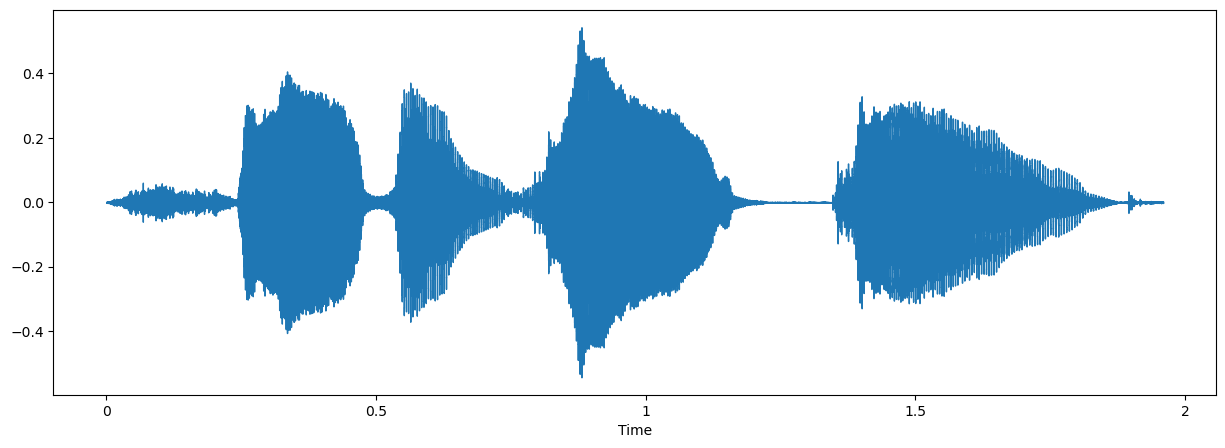

In [ ]:
fname =  TESS_DataSet + 'YAF_happy/YAF_dog_happy.wav'

data, samples = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=samples)

ipd.Audio(fname)

In [ ]:
Dir_lists = os.listdir(CREMA_DataSet)
Dir_lists.sort()
print(Dir_lists[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [ ]:
gender_identity	 = []
All_Emotions = []
Dir = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in Dir_lists:
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender_identity	.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        All_Emotions.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        All_Emotions.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        All_Emotions.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        All_Emotions.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        All_Emotions.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        All_Emotions.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        All_Emotions.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        All_Emotions.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        All_Emotions.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        All_Emotions.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        All_Emotions.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        All_Emotions.append('female_neutral')
    else:
        All_Emotions.append('Unknown')
    Dir.append(CREMA_DataSet + i)

CREMA_DataSet_df = pd.DataFrame(All_Emotions, columns = ['labels'])
CREMA_DataSet_df['source'] = 'CREMA_DataSet'
CREMA_DataSet_df = pd.concat([CREMA_DataSet_df,pd.DataFrame(Dir, columns = ['Dir'])],axis=1)
CREMA_DataSet_df.labels.value_counts()

labels
male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: count, dtype: int64

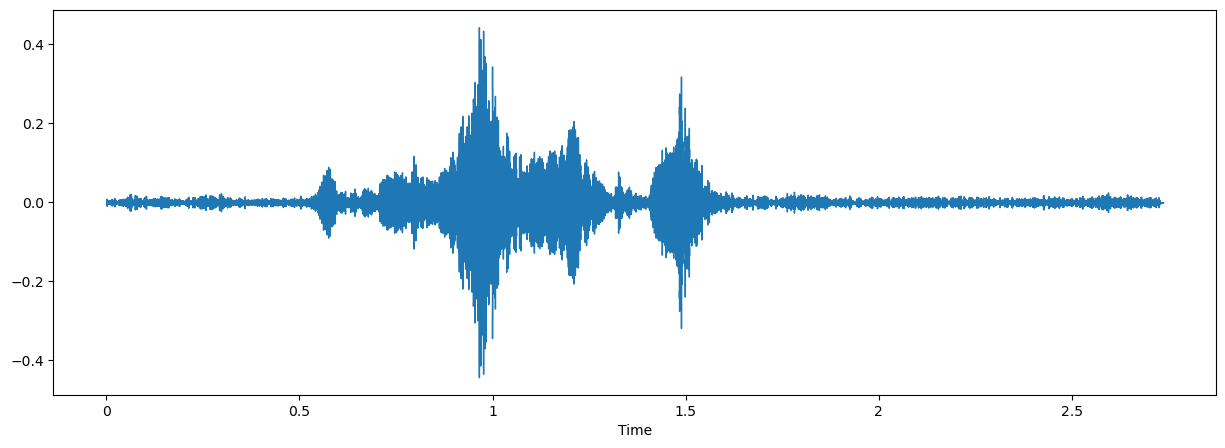

In [ ]:
fname = CREMA_DataSet + '1012_IEO_HAP_HI.wav'
data, samples = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=samples)

ipd.Audio(fname)

In [ ]:
df = pd.concat([SAVEE_DataSet_df, RAVDESS_DataSet_df, TESS_DataSet_df, CREMA_DataSet_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_Dir.csv",index=False)

labels
female_happy       1096
female_sad         1096
female_angry       1096
female_fear        1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: count, dtype: int64


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

In [ ]:
pip install --user resampy


Note: you may need to restart the kernel to use updated packages.


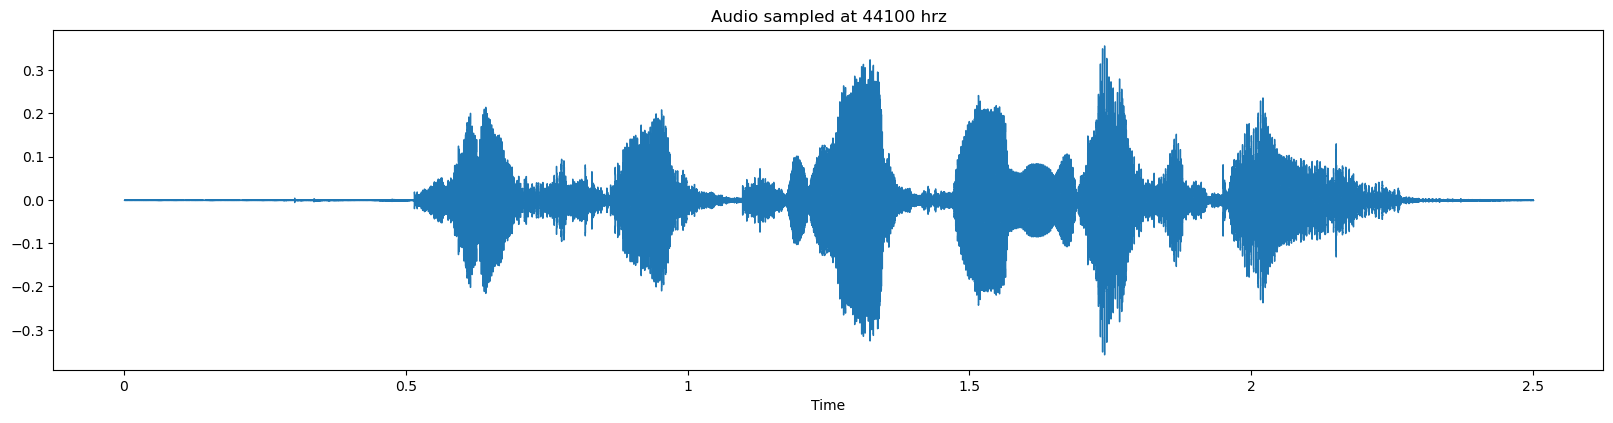

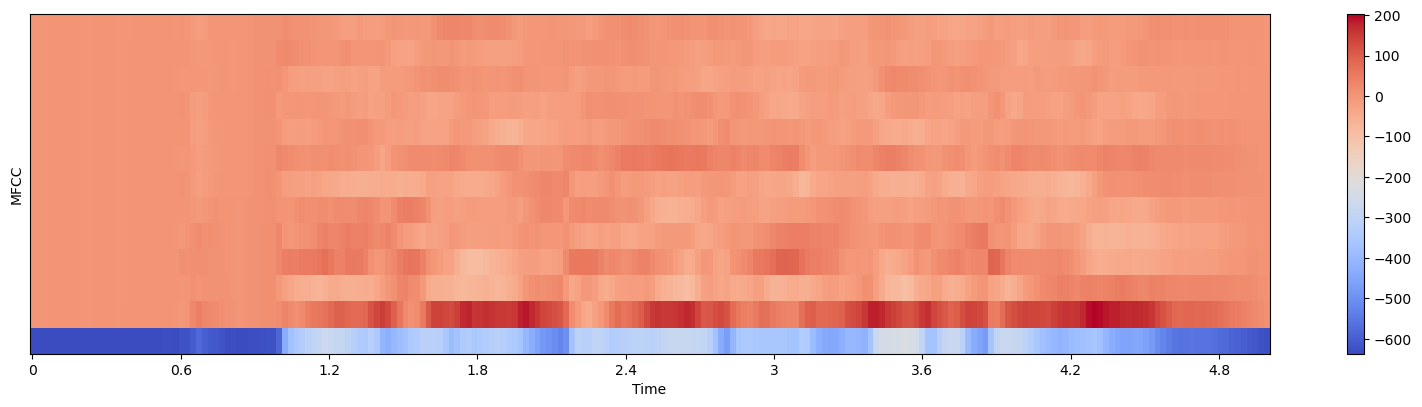

In [ ]:
Dir = "C:/Users/IDEAPAD GAMEING/Downloads/archive (1)/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(Dir, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(Dir)

216
216


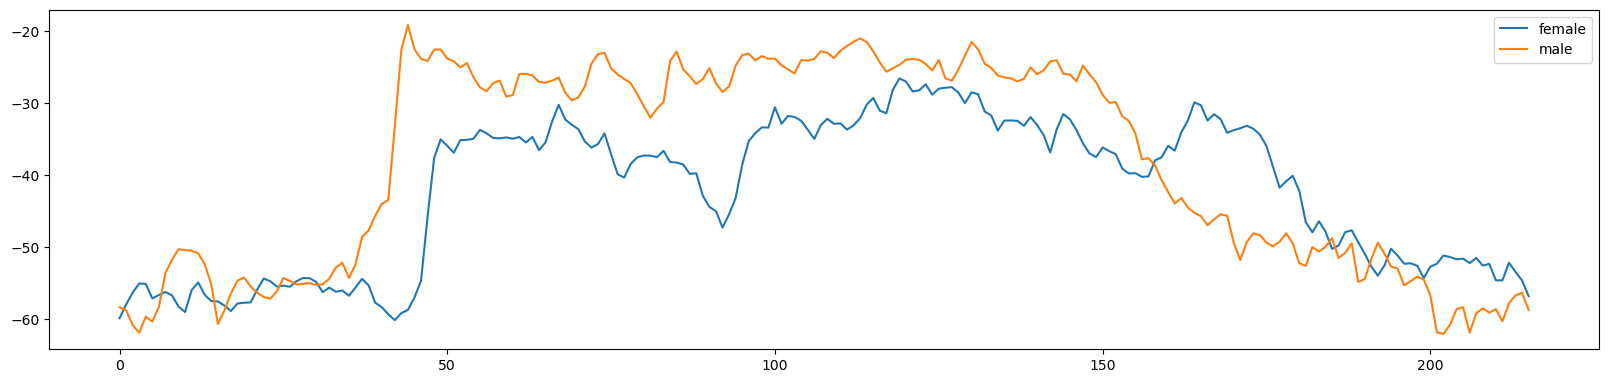

In [ ]:
Dir = "C:/Users/IDEAPAD GAMEING/Downloads/archive (1)/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(Dir, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

Dir = "C:/Users/IDEAPAD GAMEING/Downloads/archive (1)/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(Dir, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [ ]:
pip install tensorflow

In [ ]:
import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [ ]:
reference = pd.read_csv("C:/Users/IDEAPAD GAMEING/Downloads/Data_Dir.csv")
reference.head()

,labels,source,path
0,male_happy,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...
1,male_fear,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...
2,male_happy,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...
3,male_disgust,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...
4,male_angry,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...


In [ ]:
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,Dir in enumerate(reference.Dir):
    X, sample_rate = librosa.load(Dir
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)

    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1

print(len(df))
df.head()

12162


,feature
0,"[-15.78668, -18.798388, -25.468557, -25.198942..."
1,"[-25.571018, -29.788473, -39.008785, -41.50939..."
2,"[-8.769985, -12.6431875, -22.50932, -22.320293..."
3,"[-8.750768, -13.025253, -24.368538, -23.824284..."
4,"[-17.825218, -19.968874, -22.26418, -22.016508..."


In [ ]:
df = pd.concat([reference,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_happy,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-15.786680,-18.798388,-25.468557,-25.198942,-25.429789,-23.347935,-16.800251,...,-3.119453,-4.260779,-5.274272,-5.775264,-7.272361,-7.340224,-7.019254,-8.643790,-15.047346,-14.076212
1,male_fear,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-25.571018,-29.788473,-39.008785,-41.509392,-39.770164,-34.743958,-30.551401,...,-27.156343,-25.647074,-25.140005,-26.746452,-27.039562,-27.250130,-26.599064,-25.778673,-24.299049,-23.552532
2,male_happy,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-8.769985,-12.643188,-22.509319,-22.320293,-17.513346,-12.073632,-9.537951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male_disgust,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-8.750768,-13.025253,-24.368538,-23.824284,-20.085262,-20.491524,-21.797201,...,-11.261944,-12.151450,-13.157599,-13.586170,-14.427000,-15.093403,-13.683895,-13.934831,-6.857999,-1.180127
4,male_angry,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-17.825218,-19.968874,-22.264179,-22.016508,-23.868864,-23.068272,-23.807613,...,-27.922167,-27.525471,-27.459105,-26.916115,-27.472073,-29.056601,-28.666271,-28.376913,-22.565571,-17.198841


In [ ]:
df=df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_happy,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-15.786680,-18.798388,-25.468557,-25.198942,-25.429789,-23.347935,-16.800251,...,-3.119453,-4.260779,-5.274272,-5.775264,-7.272361,-7.340224,-7.019254,-8.643790,-15.047346,-14.076212
1,male_fear,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-25.571018,-29.788473,-39.008785,-41.509392,-39.770164,-34.743958,-30.551401,...,-27.156343,-25.647074,-25.140005,-26.746452,-27.039562,-27.250130,-26.599064,-25.778673,-24.299049,-23.552532
2,male_happy,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-8.769985,-12.643188,-22.509319,-22.320293,-17.513346,-12.073632,-9.537951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_disgust,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-8.750768,-13.025253,-24.368538,-23.824284,-20.085262,-20.491524,-21.797201,...,-11.261944,-12.151450,-13.157599,-13.586170,-14.427000,-15.093403,-13.683895,-13.934831,-6.857999,-1.180127
4,male_angry,SAVEE,C:/Users/IDEAPAD GAMEING/Downloads/archive (2)...,-17.825218,-19.968874,-22.264179,-22.016508,-23.868864,-23.068272,-23.807613,...,-27.922167,-27.525471,-27.459105,-26.916115,-27.472073,-29.056601,-28.666271,-28.376913,-22.565571,-17.198841


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Dir','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4950,-17.142694,-17.249537,-18.365582,-18.948351,-17.365458,-16.711090,-17.699482,-18.021383,-17.897398,-15.878503,...,-22.865425,-21.614164,-19.724932,-18.845333,-19.363422,-20.137630,-22.65514,-24.578312,-24.039165,-23.209587
3860,-12.833130,-16.663576,-22.940784,-22.980495,-23.782856,-25.614420,-27.344992,-25.838722,-23.915997,-26.146423,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9761,-4.823564,-6.056048,-9.580622,-12.012060,-9.959867,-11.912548,-13.994515,-13.555813,-14.022306,-15.118245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
7620,-7.031147,-4.253551,-4.534490,-5.836689,-5.248196,-6.456453,-8.122451,-9.154640,-8.647813,-8.178624,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
11586,-22.565975,-21.767017,-20.529488,-20.669310,-21.171089,-18.573402,-18.412350,-16.178038,-14.222462,-15.122540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
7914,-20.082027,-18.982424,-17.009443,-16.944057,-19.334974,-19.527683,-21.974348,-20.144060,-17.954927,-19.302570,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
9513,-20.103537,-18.625866,-16.116106,-16.929592,-18.197668,-18.149664,-19.240427,-18.361641,-16.917982,-16.639193,...,-17.848892,-19.357054,-17.748692,-19.136808,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5835,-21.078182,-18.671947,-17.676804,-18.009504,-18.218782,-18.676929,-16.592766,-17.796528,-17.992470,-17.824917,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5389,-22.707441,-20.160748,-18.926155,-19.429979,-19.278114,-18.125767,-18.068565,-19.879322,-20.896751,-19.176098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
11222,-20.008287,-17.640305,-19.188614,-18.435749,-17.538834,-17.817177,-17.898472,-20.555359,-18.578112,-15.957151,...,-18.031603,-18.101122,-19.630695,-20.707489,-20.239124,-18.337662,-15.54331,-17.478794,-17.017057,-19.112492


In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4950,0.374370,0.352677,0.438717,0.388605,0.498416,0.541699,0.460561,0.431723,0.435423,0.581450,...,-0.877277,-0.810076,-0.689280,-0.627077,-0.673167,-0.716267,-0.859700,-0.982784,-0.968884,-0.914848
3860,0.684896,0.395888,0.099446,0.090098,0.024151,-0.116465,-0.250588,-0.144181,-0.007876,-0.174500,...,0.540061,0.526471,0.526092,0.526815,0.512163,0.512140,0.512775,0.500812,0.494086,0.487473
9761,1.262025,1.178141,1.090160,0.902113,1.045710,0.896423,0.733723,0.760702,0.720842,0.637422,...,0.540061,0.526471,0.526092,0.526815,0.512163,0.512140,0.512775,0.500812,0.494086,0.487473
7620,1.102958,1.311066,1.464353,1.359288,1.393916,1.299756,1.166661,1.084937,1.116700,1.148334,...,0.540061,0.526471,0.526092,0.526815,0.512163,0.512140,0.512775,0.500812,0.494086,0.487473
11586,-0.016405,0.019535,0.278254,0.261199,0.217168,0.404031,0.408002,0.567523,0.706100,0.637106,...,0.540061,0.526471,0.526092,0.526815,0.512163,0.512140,0.512775,0.500812,0.494086,0.487473
7914,0.162576,0.224885,0.539281,0.536987,0.352863,0.333487,0.145381,0.275345,0.431186,0.329362,...,0.540061,0.526471,0.526092,0.526815,0.512163,0.512140,0.512775,0.500812,0.494086,0.487473
9513,0.161027,0.251179,0.605526,0.538058,0.436913,0.435355,0.346949,0.406656,0.507562,0.525446,...,-0.566322,-0.670504,-0.567512,-0.644924,0.512163,0.512140,0.512775,0.500812,0.494086,0.487473
5835,0.090798,0.247781,0.489793,0.458110,0.435352,0.396378,0.542157,0.448288,0.428421,0.438150,...,0.540061,0.526471,0.526092,0.526815,0.512163,0.512140,0.512775,0.500812,0.494086,0.487473
5389,-0.026598,0.137989,0.397148,0.352949,0.357065,0.437121,0.433349,0.294849,0.214506,0.338673,...,0.540061,0.526471,0.526092,0.526815,0.512163,0.512140,0.512775,0.500812,0.494086,0.487473
11222,0.167890,0.323859,0.377686,0.426554,0.485603,0.459933,0.445890,0.245045,0.385285,0.575660,...,-0.577647,-0.592841,-0.683474,-0.741096,-0.726773,-0.606468,-0.428857,-0.554243,-0.541534,-0.667302


In [ ]:
from sklearn import linear_model
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import RMSprop


In [ ]:
pip install np_utils


Note: you may need to restart the kernel to use updated packages.


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.clusters)

filename = 'C:/Users/IDEAPAD GAMEING/Downloads//labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(9121, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

In [ ]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
opt = RMSprop(learning_rate=0.00001, decay=1e-6)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 216, 256)            │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 216, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 216, 256)            │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 216, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 216, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 216, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 27, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 27, 128)             │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 27, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 27, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 27, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 3, 64)               │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,285,390 (4.90 MB)

 Trainable params: 1,284,622 (4.90 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
571/571 ━━━━━━━━━━━━━━━━━━━━ 88s 138ms/step - accuracy: 0.1504 - loss: 2.5018 - val_accuracy: 0.2144 - val_loss: 2.4424
Epoch 2/100
571/571 ━━━━━━━━━━━━━━━━━━━━ 77s 135ms/step - accuracy: 0.2552 - loss: 2.2177 - val_accuracy: 0.2923 - val_loss: 2.2293
Epoch 3/100
571/571 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.2904 - loss: 2.0997 - val_accuracy: 0.3114 - val_loss: 2.1492
Epoch 4/100
571/571 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.3138 - loss: 2.0108 - val_accuracy: 0.3410 - val_loss: 2.0821
Epoch 5/100
571/571 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.3343 - loss: 1.9540 - val_accuracy: 0.3499 - val_loss: 2.0372
Epoch 6/100
571/571 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.3434 - loss: 1.9137 - val_accuracy: 0.3680 - val_loss: 1.9890
Epoch 7/100
571/571 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.3676 - loss: 1.8535 - val_accuracy: 0.3749 - val_loss: 1.9523
Epoch 8/100
571/571 ━━━━━━━━━━━━━━━━━━━━ 78s 136ms/step - accuracy: 0.3723 -

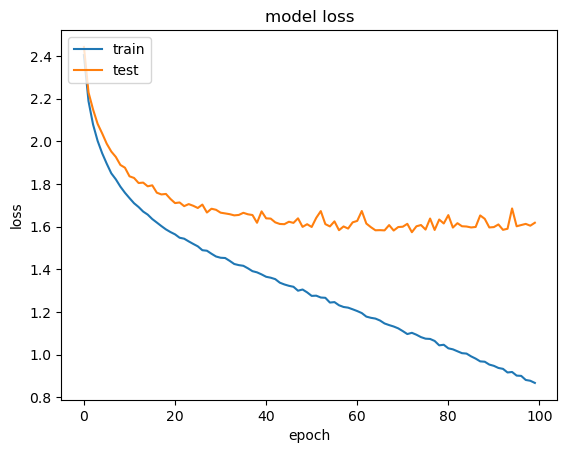

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_save = 'Emotions_Model.h5'
save_dir = os.Dir.join(os.getcwd(), 'saved_models')

if not os.Dir.isdir(save_dir):
    os.makedirs(save_dir)
model_Dir = os.Dir.join(save_dir, model_save)
model.save(model_Dir)
print('Save model and weights at %s ' % model_Dir)

model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\IDEAPAD GAMEING\saved_models\Emotions_Model.h5 


In [ ]:
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("saved_models/All_Emotionss_Model.h5")
print("Loaded model from disk")

from keras.optimizers import RMSprop

opt = RMSprop(learning_rate=0.00001, decay=1e-6)

loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

score = loaded_model.evaluate(X_test, y_test, verbose=0)

print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
compile_metrics: 43.31%


In [ ]:
All_predictions = loaded_model.predict(X_test,
                         batch_size=16,
                         verbose=1)

All_predictions=All_predictions.argmax(axis=1)
All_predictions

191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


array([11,  3,  7, ..., 11,  4,  0], dtype=int64)

In [ ]:

All_predictions = All_predictions.astype(int).flatten()
All_predictions = (lb.inverse_transform((All_predictions)))
All_predictions = pd.DataFrame({'predictedvalues': All_predictions})

actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

output_df = actual.join(All_predictions)
output_df[170:180]

,actualvalues,predictedvalues
170,male_sad,male_sad
171,female_disgust,female_disgust
172,male_angry,male_angry
173,female_disgust,female_disgust
174,male_angry,male_angry
175,female_fear,male_fear
176,male_fear,female_angry
177,female_fear,female_happy
178,female_happy,female_happy
179,female_neutral,female_neutral


In [ ]:
output_df.to_csv('Predictions.csv', index=False)
output_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,322
female_disgust,395
female_fear,229
female_happy,394
female_neutral,319
female_sad,279
female_surprise,107
male_angry,200
male_disgust,77


In [ ]:
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def gender_identity	(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.4330812232818152


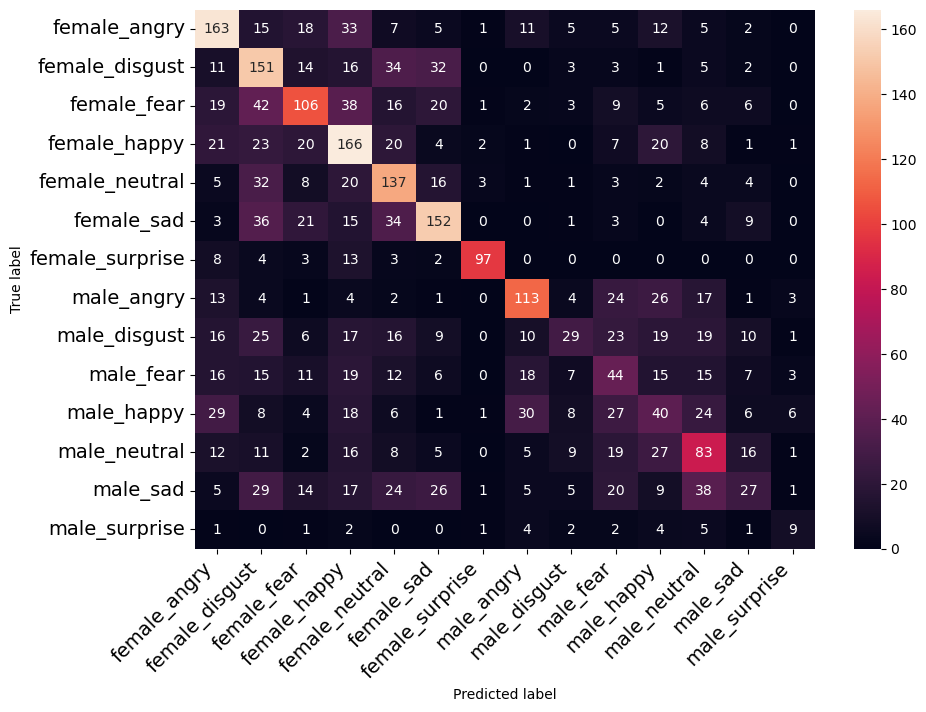

In [ ]:
output_df = pd.read_csv("Predictions.csv")
clusters = output_df.actualvalues.unique()
clusters.sort()

c = confusion_matrix(output_df.actualvalues, output_df.predictedvalues)
print(accuracy_score(output_df.actualvalues, output_df.predictedvalues))
confusion_matrix(c, class_names = clusters)

In [ ]:
clusters = output_df.actualvalues.unique()
clusters.sort()
print(classification_report(output_df.actualvalues, output_df.predictedvalues, target_names=clusters))

                 precision    recall  f1-score   support

   female_angry       0.51      0.58      0.54       282
 female_disgust       0.38      0.56      0.45       272
    female_fear       0.46      0.39      0.42       273
   female_happy       0.42      0.56      0.48       294
 female_neutral       0.43      0.58      0.49       236
     female_sad       0.54      0.55      0.55       278
female_surprise       0.91      0.75      0.82       130
     male_angry       0.56      0.53      0.55       213
   male_disgust       0.38      0.14      0.21       200
      male_fear       0.23      0.23      0.23       188
     male_happy       0.22      0.19      0.21       208
   male_neutral       0.36      0.39      0.37       214
       male_sad       0.29      0.12      0.17       221
  male_surprise       0.36      0.28      0.32        32

       accuracy                           0.43      3041
      macro avg       0.43      0.42      0.42      3041
   weighted avg       0.43   

0.8059848733969089


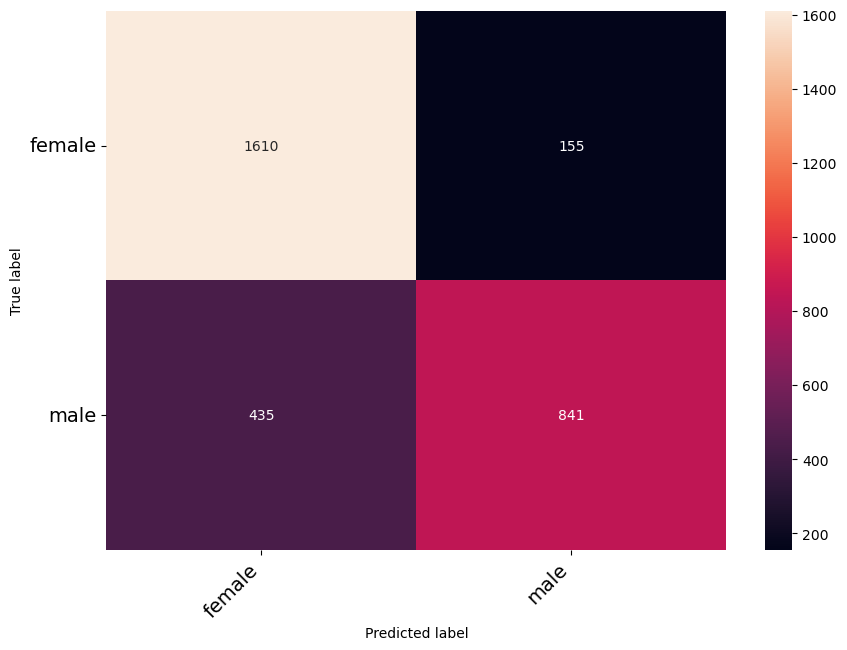

In [ ]:
modidf = output_df
modidf['actualvalues'] = output_df.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = output_df.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

clusters = modidf.actualvalues.unique()
clusters.sort()

c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
confusion_matrix(c, class_names = clusters)

In [ ]:
clusters = modidf.actualvalues.unique()
clusters.sort()
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=clusters))

              precision    recall  f1-score   support

      female       0.79      0.91      0.85      1765
        male       0.84      0.66      0.74      1276

    accuracy                           0.81      3041
   macro avg       0.82      0.79      0.79      3041
weighted avg       0.81      0.81      0.80      3041



0.4850378165077277


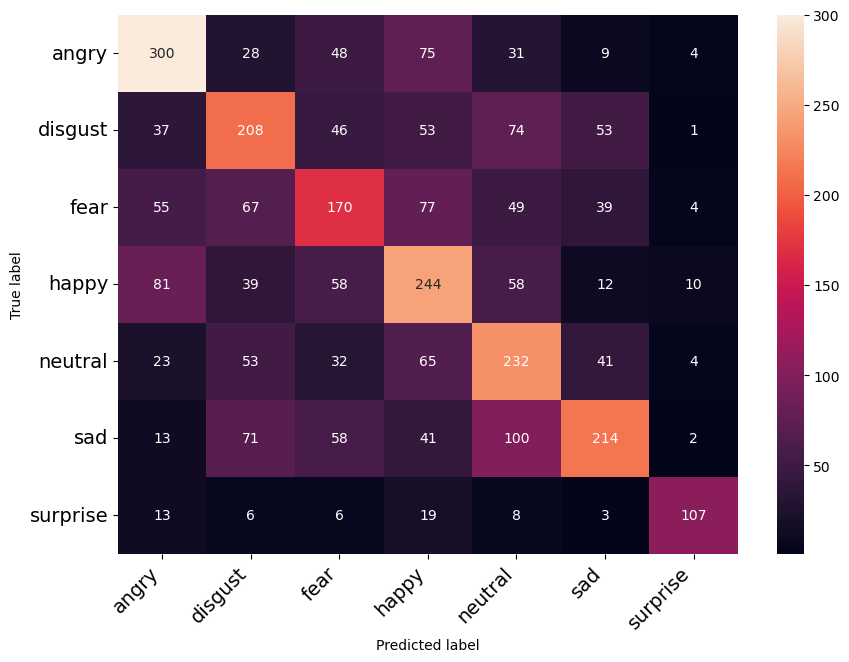

In [ ]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

clusters = modidf.actualvalues.unique()
clusters.sort()

c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
confusion_matrix(c, class_names = clusters)


In [ ]:
clusters = modidf.actualvalues.unique()
clusters.sort()
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=clusters))

              precision    recall  f1-score   support

       angry       0.57      0.61      0.59       495
     disgust       0.44      0.44      0.44       472
        fear       0.41      0.37      0.39       461
       happy       0.43      0.49      0.45       502
     neutral       0.42      0.52      0.46       450
         sad       0.58      0.43      0.49       499
    surprise       0.81      0.66      0.73       162

    accuracy                           0.49      3041
   macro avg       0.52      0.50      0.51      3041
weighted avg       0.49      0.49      0.49      3041



In [ ]:
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
data, samples = librosa.load('C:/Users/IDEAPAD GAMEING/Downloads/archive/TESS_DataSet Toronto All_Emotionsal speech set data/TESS_DataSet Toronto All_Emotionsal speech set data/OAF_happy/OAF_bath_happy.wav')
ipd.Audio('C:/Users/IDEAPAD GAMEING/Downloads/archive/TESS_DataSet Toronto All_Emotionsal speech set data/TESS_DataSet Toronto All_Emotionsal speech set data/OAF_happy/OAF_bath_happy.wav')


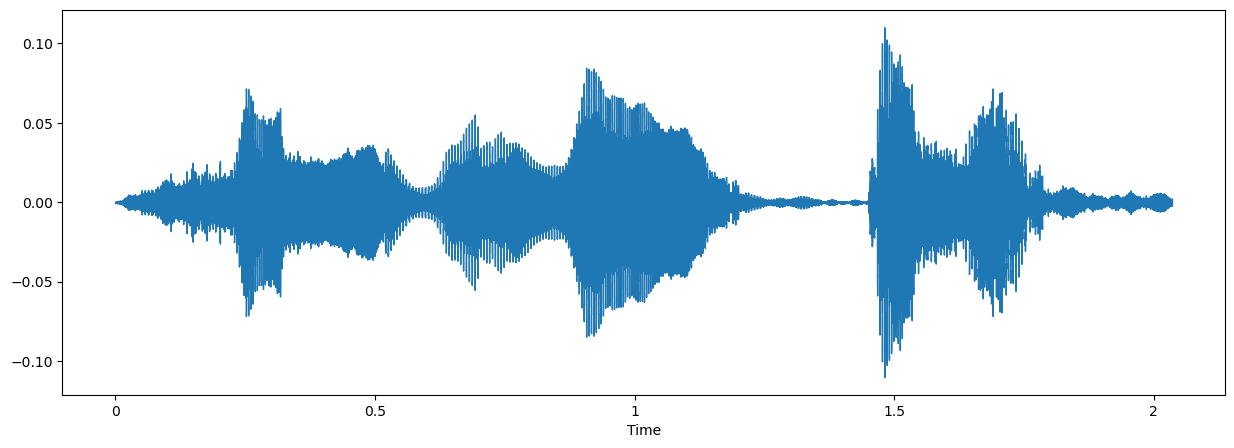

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=samples)

In [ ]:
from keras.models import Sequential, model_from_json


In [ ]:
from tensorflow.keras.models import Sequential, model_from_json


In [ ]:
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("C:/Users/IDEAPAD GAMEING/saved_models/All_Emotionss_Model.h5")
print("Loaded model from disk")

opt = RMSprop(learning_rate=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
compile_metrics: 43.31%


In [ ]:
All_predictions = loaded_model.predict(X_test,
                         batch_size=10,
                         verbose=1)

All_predictions=All_predictions.argmax(axis=1)
All_predictions

305/305 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


array([11,  3,  7, ..., 11,  4,  0], dtype=int64)

In [ ]:
All_predictions = All_predictions.astype(int).flatten()
All_predictions = (lb.inverse_transform((All_predictions)))
All_predictions = pd.DataFrame({'predictedvalues': All_predictions})

actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

output_df = actual.join(All_predictions)
output_df.head()

,actualvalues,predictedvalues
0,female_disgust,male_neutral
1,female_happy,female_happy
2,male_sad,male_angry
3,male_angry,male_neutral
4,male_happy,male_angry


In [ ]:
output_df.to_csv('Predictions.csv', index=False)
output_df.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,322
female_disgust,395
female_fear,229
female_happy,394
female_neutral,319
female_sad,279
female_surprise,107
male_angry,200
male_disgust,77


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
clusters = output_df.actualvalues.unique()
clusters.sort()
print(classification_report(output_df.actualvalues, output_df.predictedvalues, target_names=clusters))

                 precision    recall  f1-score   support

   female_angry       0.51      0.58      0.54       282
 female_disgust       0.38      0.56      0.45       272
    female_fear       0.46      0.39      0.42       273
   female_happy       0.42      0.56      0.48       294
 female_neutral       0.43      0.58      0.49       236
     female_sad       0.54      0.55      0.55       278
female_surprise       0.91      0.75      0.82       130
     male_angry       0.56      0.53      0.55       213
   male_disgust       0.38      0.14      0.21       200
      male_fear       0.23      0.23      0.23       188
     male_happy       0.22      0.19      0.21       208
   male_neutral       0.36      0.39      0.37       214
       male_sad       0.29      0.12      0.17       221
  male_surprise       0.36      0.28      0.32        32

       accuracy                           0.43      3041
      macro avg       0.43      0.42      0.42      3041
   weighted avg       0.43   

In [ ]:
json_file=open("C:/Users/IDEAPAD GAMEING/model_json.json","r")
lloaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("C:/Users/IDEAPAD GAMEING/saved_models/All_Emotionss_Model.h5")
print("Loaded Model from disk")

loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
score=loaded_model.evaluate(X_test, y_test, verbose=0)
print(loaded_model.metrics_names[1],score[1]*100)

Loaded Model from disk
compile_metrics 43.30812096595764


In [ ]:
newData,newSR= librosa.load("C:/Users/IDEAPAD GAMEING/Downloads/archive (2)/ALL/DC_a14.wav")


In [ ]:
ipd.Audio("C:/Users/IDEAPAD GAMEING/Downloads/archive (2)/ALL/DC_a14.wav")


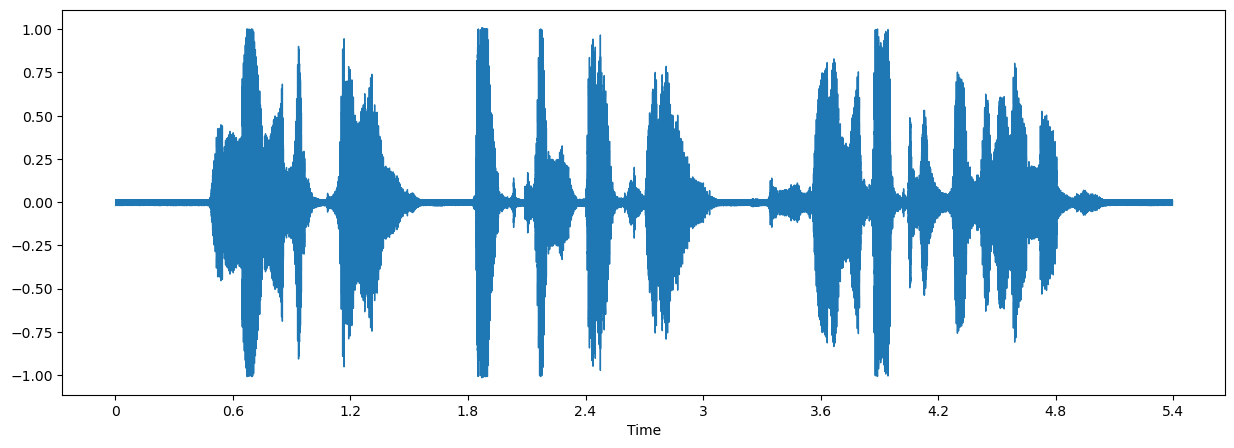

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(newData, sr=newSR)


In [ ]:
newData, newSR = librosa.load("C:/Users/IDEAPAD GAMEING/Downloads/archive (2)/ALL/DC_a14.wav"
                              ,duration=2.5
                              ,sr=44100
                              ,offset=0.5)

newSR = np.array(newSR)
mfccs = np.mean(librosa.feature.mfcc(y=newData, sr=newSR, n_mfcc=13),axis=0)
newdf = pd.DataFrame(data=mfccs).T
newdf

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-6.754294,-7.93813,-7.774526,-6.665485,-6.886405,-6.833149,-6.846772,-7.539449,-8.00246,-8.053309,...,-3.526836,-4.039115,-4.677498,-5.190487,-5.648729,-5.32139,-5.392025,-5.467065,-5.50994,-4.208325


In [ ]:
newdf= np.expand_dims(newdf,axis=2)
print(newdf.shape)
newpred=model.predict(newdf)

(1, 216, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
filename = 'C:/Users/IDEAPAD GAMEING/Downloads/labels'
infile = open(filename,'rb')
lb = pickle.load(infile)
infile.close()

# Get the final_output predicted label
final_output = newpred.argmax(axis=1)
final_output = final_output.astype(int).flatten()
final_output = (lb.inverse_transform((final_output)))
print(final_output) #emo(final_output) #gender_identity	(final_output

['male_neutral']
